In [ ]:
!pip install pymorphy2

In [391]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/e4/43/fd3cd5989d6b592af1c2e4f37bf887f74b790f10b568b2497fe874a67fc7/matplotlib-3.8.3-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/fd/7c/168f8343f33d861305e18c56901ef1bb675d3c7f977f435ec72751a71a54/contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata
  Using cached contourpy-1.2.0-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/98/aa/482ce7af3fd572121a673d9af4b73901cb0ee29b676aaf576fd67856e9fe/fonttools-4.49.0-cp310-cp310-win_amd64.whl.metadata
   


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import json
import re
import pymorphy2
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
EDU_DATA_PATH = '../data/case_2_data_for_members.json'
edu_data = json.load(open(EDU_DATA_PATH, 'r', encoding='utf-8'))

In [241]:
edu_data = edu_data

In [242]:
morph = pymorphy2.MorphAnalyzer()

In [243]:
def clear_string(string):
    string = re.sub('[\.\,\;\(\)\—\–\\\/\:\•\«\»\!\?\_\n\t\"“]', ' ', string)
    string = re.sub(' [-0-9]+ ', ' ', string)
    string = re.sub('[ ]+', ' ', string)
    # string = ' '.join(morph.parse(word)[0].normal_form for word in string)
    return string.strip()


In [251]:
def unite_person_data():
    result = []
    experience_keys = ('starts', 'ends', 'employer', 'city', 'position', 'description')
    education_keys = ('year', 'organization', 'faculty', 'specialty', 'result', 'education_type', 'education_level')
    for row in edu_data:
        vacancy = {}
        for key in row['vacancy']:
            vacancy[f'vacancy_{key}'] = row['vacancy'][key]
        for passed, resume_key in enumerate(('failed_resumes', 'confirmed_resumes')):
            person = {}
            for person_info in row[resume_key]:
                for key in person_info:
                    person[f'person_{key}'] = person_info[key]
                experience = ''
                for experience_item in person_info.get('experienceItem', {}):
                    experience += ' '.join([str(experience_item[key]) for key in experience_keys])
                education = ''
                for education_item in person_info.get('educationItem', {}):
                    education += ' '.join([str(education_item[key]) for key in education_keys])
                person['person_experienceItem'] = clear_string(experience)
                person['person_educationItem'] = clear_string(education)
                person['person_passed'] = passed
                result.append(vacancy | person)
    return result

In [252]:
arr = unite_person_data()
print(arr[0])

TypeError: string indices must be integers

In [7]:
print(len(arr))

656


In [8]:
arr[0].keys()

dict_keys(['vacancy_uuid', 'vacancy_name', 'vacancy_keywords', 'vacancy_description', 'vacancy_comment', 'person_uuid', 'person_first_name', 'person_last_name', 'person_birth_date', 'person_country', 'person_city', 'person_about', 'person_key_skills', 'person_experienceItem', 'person_educationItem', 'person_passed'])

In [9]:
key_skills = set()

In [10]:
for row in arr:
    key_skills |= set([clear_string(word).lower().replace(', ', '').strip() for word in
                       (row.get('person_key_skills') or '').split(', ')])
sorted(key_skills)[:10]

['',
 '#c',
 '-дизайн',
 '11',
 '17',
 '1c',
 '1c erp',
 '1c бухгалтерия',
 '1с erp управление холдингом',
 '1с документооборот']

In [11]:
open('key_skills.txt', 'w', encoding='utf-8').write('\n'.join(sorted(key_skills)[1:]))

23377

In [12]:
len(key_skills)

1691

In [116]:
category = 'person_key_skills'
df = pd.DataFrame(arr)
df[category]

0      Java, Spring Boot, Java EE, SQL, Hibernate, Gi...
1      ООП, Java, Java Spring Framework, Функциональн...
2      Java, Spring Framework, Hibernate ORM, SQL, Ja...
3      Java, Git, SQL, HTML, JavaScript, CSS, MySQL, ...
4      Java, Spring, Git, PostgreSQL, Hibernate ORM, ...
                             ...                        
651    JavaScript, TypeScript, Vue.js, Nuxt.js, Node....
652    JavaScript, TypeScript, Vue js, Nuxt, HTML, CS...
653    JavaScript, TypeScript, Vue.js, Nuxt, Nest, No...
654    JavaScript, TypeScript, Vue.js, Nuxt.js, Автом...
655    JavaScript, Vue.js, Node.js, HTML5, CSS3, jQue...
Name: person_key_skills, Length: 656, dtype: object

In [117]:
key_skills = list(key_skills)
binary_data = df.to_dict('records')
for row in binary_data:
    for skill in key_skills:
        row[skill] = skill in (row[category] or '').lower()
binary_df = pd.DataFrame(binary_data)
binary_df.pop(category)

0      Java, Spring Boot, Java EE, SQL, Hibernate, Gi...
1      ООП, Java, Java Spring Framework, Функциональн...
2      Java, Spring Framework, Hibernate ORM, SQL, Ja...
3      Java, Git, SQL, HTML, JavaScript, CSS, MySQL, ...
4      Java, Spring, Git, PostgreSQL, Hibernate ORM, ...
                             ...                        
651    JavaScript, TypeScript, Vue.js, Nuxt.js, Node....
652    JavaScript, TypeScript, Vue js, Nuxt, HTML, CS...
653    JavaScript, TypeScript, Vue.js, Nuxt, Nest, No...
654    JavaScript, TypeScript, Vue.js, Nuxt.js, Автом...
655    JavaScript, Vue.js, Node.js, HTML5, CSS3, jQue...
Name: person_key_skills, Length: 656, dtype: object

In [118]:
len(binary_df[binary_df['ооп'] == True])

81

In [119]:
binary_df['ооп']

0      False
1       True
2      False
3       True
4      False
       ...  
651    False
652    False
653    False
654    False
655    False
Name: ооп, Length: 656, dtype: bool

In [120]:
skill_frequencies = {}
for skill in key_skills:
    skill_frequencies[skill] = len(binary_df[binary_df[skill]])


In [121]:
binary_df.columns

Index(['vacancy_uuid', 'vacancy_name', 'vacancy_keywords',
       'vacancy_description', 'vacancy_comment', 'person_uuid',
       'person_first_name', 'person_last_name', 'person_birth_date',
       'person_country',
       ...
       'oracle vm virtualbox', 'product owner', 'ribbon', 'snort', 'helidon',
       'selenium webdriver', 'kotlin 8 coroutines', 'yed', 'eureka', 'ux ui'],
      dtype='object', length=1708)

Index(['vacancy_uuid', 'vacancy_name', 'vacancy_keywords',
       'vacancy_description', 'vacancy_comment', 'person_uuid',
       'person_first_name', 'person_last_name', 'person_birth_date',
       'person_country',
       ...
       'oracle vm virtualbox', 'product owner', 'ribbon', 'snort', 'helidon',
       'selenium webdriver', 'kotlin 8 coroutines', 'yed', 'eureka', 'ux ui'],
      dtype='object', length=1708)

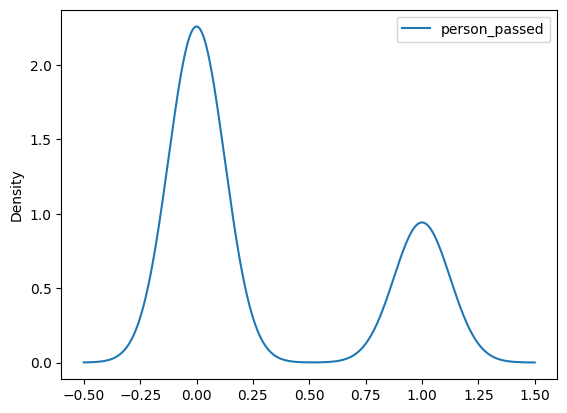

In [122]:
binary_df.plot(kind='density')
binary_df.columns

In [123]:
def update_key(unique_key):
    skills_to_plot[unique_key] = sum(skills_to_plot[key] for key in skills_to_plot if unique_key in key)
    [skills_to_plot.pop(key) for key in tuple(skills_to_plot.keys()) if unique_key in key and unique_key != key]

In [124]:
skills_to_plot = {}
for skill in sorted(skill_frequencies.items(), key=lambda x: x[1])[:-1]:
    skills_to_plot[skill[0]] = skill[1]
    key = skill[0]
    if key in skill[0]:
        print(skills_to_plot.get(skill[0]))
        update_key(key)
skills_to_plot['postgresql'] += skills_to_plot['postgre'] + skills_to_plot['postgres']
skills_to_plot['spring'] += skills_to_plot['spring framework']
update_key('docker')
update_key('jira')
update_key('ux')
git_keys = (
    'gitlab опыт работы с инструментами intellij idea', 'gitlab ci cd', 'gitlab ci для ci cd', 'java git',
    'gitab ci cd',
    'digital marketing', 'digital ocean', 'git-flow', 'git bash', 'github', 'gitlab ci', 'gitlab')
skills_to_plot['git'] += sum(skills_to_plot[key] for key in git_keys)
keys_to_remove = ('r', 'c', 'er', 'postgre', 'postgres', 'spring framework') + git_keys
[skills_to_plot.pop(key) for key in keys_to_remove]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


KeyError: 'postgresql'

In [180]:
skills_to_plot_1 = skills_to_plot.copy()
to_remove = ('r', 'c', 'ирование', 'atlassian', 'di', 'bi', 'boot', 'mq')
[skills_to_plot_1.pop(key) for key in to_remove]
sorted(skills_to_plot_1.items(), key=lambda x: x[1])[-10:]

[('go', 217),
 ('js', 229),
 ('kafka', 230),
 ('api', 244),
 ('maven', 291),
 ('ux', 306),
 ('ml', 402),
 ('git', 445),
 ('java', 520),
 ('sql', 744)]

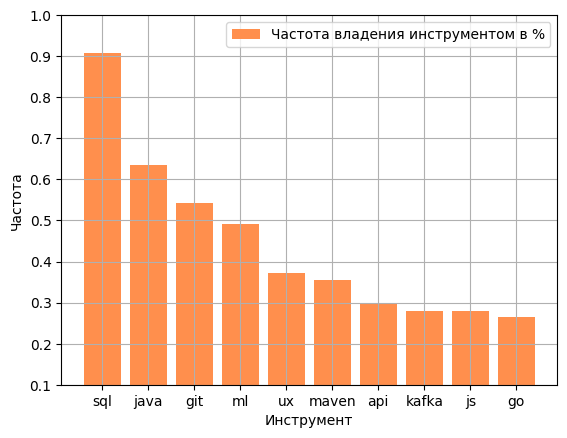

In [239]:
to_plot = sorted(skills_to_plot_1.items(), key=lambda x: x[1])[-10:][::-1]
x = [v[0] for v in to_plot]
y = [v[1] * .8 / len(df) for v in to_plot]
# plt.title
plt.xlabel('Инструмент')
plt.ylabel('Частота')
plt.grid()
plt.ylim(0.1)
plt.bar(x, y, color='#ff8f4d', label='Частота владения инструментом в %')
plt.legend()
plt.savefig('bar.png', format='png')
plt.show()